<a href="https://colab.research.google.com/github/EnricoHuber/SoloLearn/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)       # X is a column vector
print(X, X.shape)
y = 4 + 3 * X + np.random.randn(100, 1)     # np.random.randn(100, 1) generates gaussian noise

[[0.83996019]
 [1.81096451]
 [0.40891758]
 [0.17382874]
 [1.78040716]
 [1.88707111]
 [0.01698913]
 [1.03514674]
 [0.93679465]
 [1.43703263]
 [0.19218674]
 [0.09934583]
 [0.52321845]
 [1.88329074]
 [1.41467   ]
 [0.33124941]
 [0.96714259]
 [0.43136555]
 [0.58688176]
 [1.89006524]
 [1.0191424 ]
 [1.00355938]
 [1.54706647]
 [0.97388272]
 [0.49496302]
 [0.05782428]
 [1.44739613]
 [0.41465585]
 [1.40034276]
 [0.52151527]
 [0.60160436]
 [0.79086565]
 [0.37629484]
 [1.31840113]
 [0.49951919]
 [0.57936969]
 [0.89551037]
 [0.30240073]
 [1.34409251]
 [0.03362627]
 [1.59118171]
 [1.2254847 ]
 [0.64969235]
 [0.61053698]
 [1.71972857]
 [1.0433981 ]
 [1.80574483]
 [1.83244671]
 [1.66428687]
 [0.55178318]
 [1.32051628]
 [0.49843183]
 [0.84853071]
 [0.2706571 ]
 [1.12321549]
 [1.83496343]
 [1.16894925]
 [0.65092036]
 [1.56643138]
 [1.59879291]
 [1.5001455 ]
 [0.60411368]
 [1.60278304]
 [1.42632208]
 [0.92896634]
 [0.2139754 ]
 [0.17130941]
 [1.60620428]
 [0.96455602]
 [1.95459437]
 [1.22644661]
 [0.10

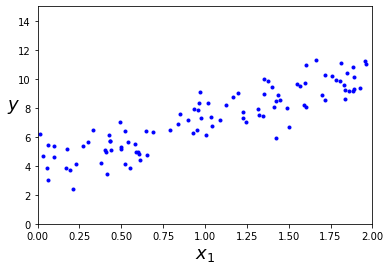

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

Normal equation (for computing $\theta$ directly)
$$
\theta=\left(X^{T} X\right)^{-1} \cdot\left(X^{T} y\right)
$$

In [ ]:
# before we need to add all 1's to x0 for each instance
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
print(X_b)

[[1.         0.83996019]
 [1.         1.81096451]
 [1.         0.40891758]
 [1.         0.17382874]
 [1.         1.78040716]
 [1.         1.88707111]
 [1.         0.01698913]
 [1.         1.03514674]
 [1.         0.93679465]
 [1.         1.43703263]
 [1.         0.19218674]
 [1.         0.09934583]
 [1.         0.52321845]
 [1.         1.88329074]
 [1.         1.41467   ]
 [1.         0.33124941]
 [1.         0.96714259]
 [1.         0.43136555]
 [1.         0.58688176]
 [1.         1.89006524]
 [1.         1.0191424 ]
 [1.         1.00355938]
 [1.         1.54706647]
 [1.         0.97388272]
 [1.         0.49496302]
 [1.         0.05782428]
 [1.         1.44739613]
 [1.         0.41465585]
 [1.         1.40034276]
 [1.         0.52151527]
 [1.         0.60160436]
 [1.         0.79086565]
 [1.         0.37629484]
 [1.         1.31840113]
 [1.         0.49951919]
 [1.         0.57936969]
 [1.         0.89551037]
 [1.         0.30240073]
 [1.         1.34409251]
 [1.         0.03362627]


In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
print(theta_best)

[[3.90919602]
 [3.26085248]]


Let's make predictions using

$$
\hat{y} = \theta^{T} \cdot x = x \cdot \theta
$$

In [ ]:
X_new = np.array([[0], [2]])      # Once theta is found, I only need two points to plot the line
print(X_new)

[[0]
 [2]]


In [ ]:
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[1. 0.]
 [1. 2.]]
[[ 3.90919602]
 [10.43090099]]


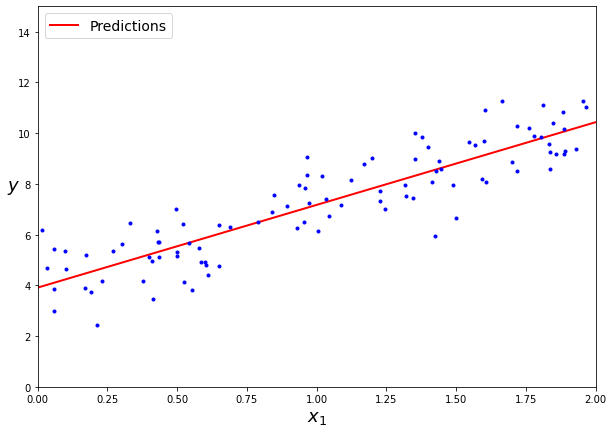

In [ ]:
plt.figure(figsize=(10,7))


plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()

In [ ]:
# Now with Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.90919602] [[3.26085248]]
[[ 3.90919602]
 [10.43090099]]


In [ ]:
print(lin_reg.predict(X_new))

[[ 3.90919602]
 [10.43090099]]


Linear regression class of Scikit-Learn is based on

In [ ]:
# See how this results matches the previous one
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

array([[3.90919602],
       [3.26085248]])

Batch Gradient Descent implementation

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)      # See how the result matches

[[3.90919602]
 [3.26085248]]


Stochastic Gradient Descent

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

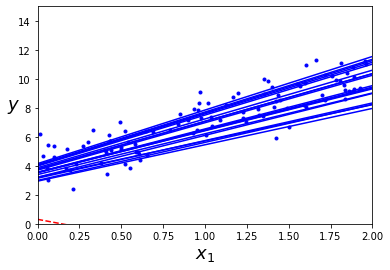

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
# save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [ ]:
print(theta)

[[3.91140122]
 [3.28326253]]


In [ ]:
# Let's see how to implement Stochastics Gradient Descent with Scikit-Learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.88432476] [3.2153003]


### Polynomial Regression


In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

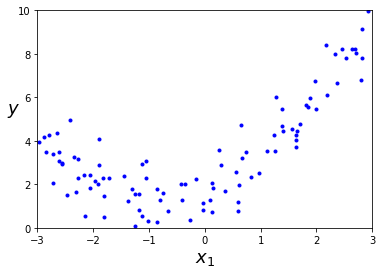

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Learning Curves

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Underfitting

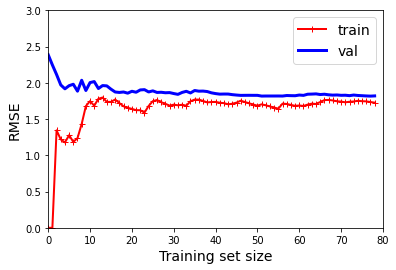

In [34]:
# See the condition of underfitting

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
# save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()  

Overfitting

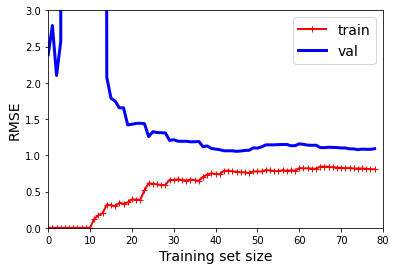

In [35]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown